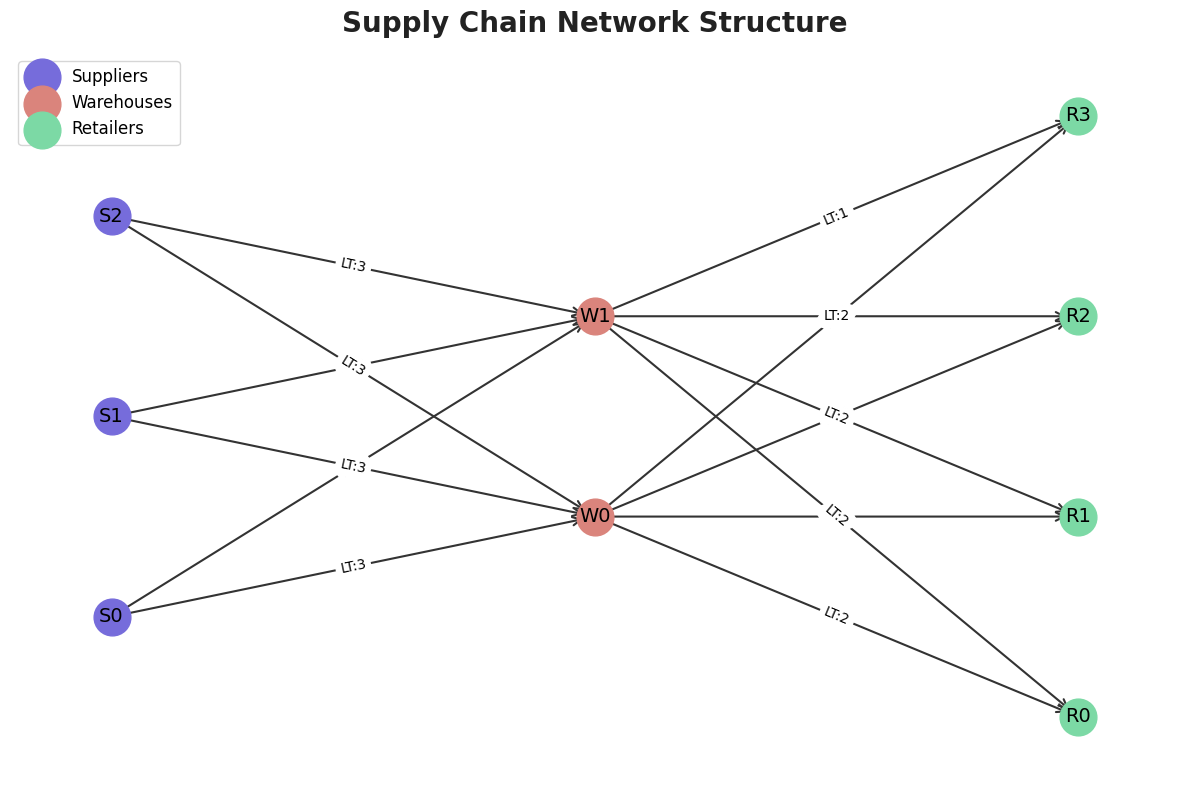

Supply Chain MDP model initialized successfully!


In [4]:
# Define the Supply Chain MDP (Markov Decision Process) class
class SupplyChainMDP:
    def __init__(self, num_suppliers, num_warehouses, num_retailers,
                 max_inventory, max_demand, lead_time_max=3):
        """
        Initialize the Supply Chain MDP

        Parameters:
        -----------
        num_suppliers: int
            Number of suppliers in the supply chain
        num_warehouses: int
            Number of warehouses in the supply chain
        num_retailers: int
            Number of retailers in the supply chain
        max_inventory: int
            Maximum inventory capacity at each location
        max_demand: int
            Maximum possible demand at retailers
        lead_time_max: int
            Maximum lead time for deliveries
        """
        self.num_suppliers = num_suppliers
        self.num_warehouses = num_warehouses
        self.num_retailers = num_retailers
        self.max_inventory = max_inventory
        self.max_demand = max_demand
        self.lead_time_max = lead_time_max

        # Define state space dimensions
        self.inventory_levels = np.zeros((num_suppliers + num_warehouses + num_retailers,))
        self.pending_orders = []  # List to track orders in transit

        # Define action space (order quantities)
        self.max_order = max_inventory  # Maximum order size

        # Initialize transition probabilities
        self.demand_probs = self._initialize_demand_probabilities()
        self.lead_time_probs = self._initialize_lead_time_probabilities()

        # Cost parameters
        self.holding_cost = 1.0  # Cost per unit per time period
        self.stockout_cost = 10.0  # Cost per unit of unfulfilled demand
        self.order_cost = 5.0  # Fixed cost per order
        self.transport_cost = 0.5  # Cost per unit per distance

        # Create network structure
        self.network = self._create_network()

    def _initialize_demand_probabilities(self):
        """Initialize demand probability distributions for retailers"""
        # For simplicity, using uniform distribution initially
        # In a real system, this would be based on historical data
        demand_probs = np.ones((self.num_retailers, self.max_demand + 1)) / (self.max_demand + 1)
        return demand_probs

    def _initialize_lead_time_probabilities(self):
        """Initialize lead time probability distributions"""
        # For simplicity, using uniform distribution initially
        lead_time_probs = np.ones((self.lead_time_max + 1,)) / (self.lead_time_max + 1)
        return lead_time_probs

    def _create_network(self):
        """Create a network representation of the supply chain"""
        G = nx.DiGraph()

        # Add supplier nodes
        for i in range(self.num_suppliers):
            G.add_node(f"S{i}", type="supplier", inventory=self.max_inventory)

        # Add warehouse nodes
        for i in range(self.num_warehouses):
            G.add_node(f"W{i}", type="warehouse", inventory=self.max_inventory//2)

        # Add retailer nodes
        for i in range(self.num_retailers):
            G.add_node(f"R{i}", type="retailer", inventory=self.max_inventory//4)

        # Connect suppliers to warehouses (fully connected for simplicity)
        for i in range(self.num_suppliers):
            for j in range(self.num_warehouses):
                # Random distance between 1 and 10
                distance = np.random.randint(1, 11)
                G.add_edge(f"S{i}", f"W{j}", distance=distance,
                           lead_time=min(1 + distance//3, self.lead_time_max))

        # Connect warehouses to retailers (fully connected for simplicity)
        for i in range(self.num_warehouses):
            for j in range(self.num_retailers):
                # Random distance between 1 and 5
                distance = np.random.randint(1, 6)
                G.add_edge(f"W{i}", f"R{j}", distance=distance,
                           lead_time=min(1 + distance//3, self.lead_time_max))

        return G

    def visualize_network(self):
        """Visualize the supply chain network"""
        plt.figure(figsize=(12, 8))

        # Create position layout
        pos = {}

        # Position suppliers on the left
        for i in range(self.num_suppliers):
            pos[f"S{i}"] = (0, i - self.num_suppliers/2 + 0.5)

        # Position warehouses in the middle
        for i in range(self.num_warehouses):
            pos[f"W{i}"] = (1, i - self.num_warehouses/2 + 0.5)

        # Position retailers on the right
        for i in range(self.num_retailers):
            pos[f"R{i}"] = (2, i - self.num_retailers/2 + 0.5)

        # Draw nodes with different colors for each type
        supplier_nodes = [n for n in self.network.nodes if n.startswith('S')]
        warehouse_nodes = [n for n in self.network.nodes if n.startswith('W')]
        retailer_nodes = [n for n in self.network.nodes if n.startswith('R')]

        # Draw edges with lead time as labels
        edge_labels = {(u, v): f"LT:{d['lead_time']}" for u, v, d in self.network.edges(data=True)}

        # Draw the network
        nx.draw_networkx_nodes(self.network, pos, nodelist=supplier_nodes,
                              node_color='#766CDB', node_size=700, label='Suppliers')
        nx.draw_networkx_nodes(self.network, pos, nodelist=warehouse_nodes,
                              node_color='#DA847C', node_size=700, label='Warehouses')
        nx.draw_networkx_nodes(self.network, pos, nodelist=retailer_nodes,
                              node_color='#7CD9A5', node_size=700, label='Retailers')

        nx.draw_networkx_edges(self.network, pos, width=1.5, edge_color='#333333',
                              arrowsize=15, arrowstyle='->')
        nx.draw_networkx_labels(self.network, pos, font_size=14, font_family='Lato')
        nx.draw_networkx_edge_labels(self.network, pos, edge_labels=edge_labels,
                                    font_size=10, font_family='Lato')

        plt.title('Supply Chain Network Structure', fontsize=20, fontweight='semibold',
                 fontname='Lato', pad=15, color='#222222')
        plt.legend(fontsize=12)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# Create a simple supply chain instance
np.random.seed(42)  # For reproducibility
supply_chain = SupplyChainMDP(
    num_suppliers=3,
    num_warehouses=2,
    num_retailers=4,
    max_inventory=100,
    max_demand=20
)

# Visualize the network
supply_chain.visualize_network()

print("Supply Chain MDP model initialized successfully!")

Defining a simple supply chain MDP scenario...
Creating MDP instance and running value iteration...
Value iteration converged in 90 iterations.
Final Value Function:
{'S1': 57.298803518180605, 'S2': 55.12603797128537, 'S3': 49.98243100940604, 'S4': 52.60161742936967, 'S5': 51.80380075658659}
Final Policy:
{'S1': 'A2', 'S2': 'A3', 'S3': 'A3', 'S4': 'A3', 'S5': 'A2'}
1. Visualizing the state value function and optimal policy:


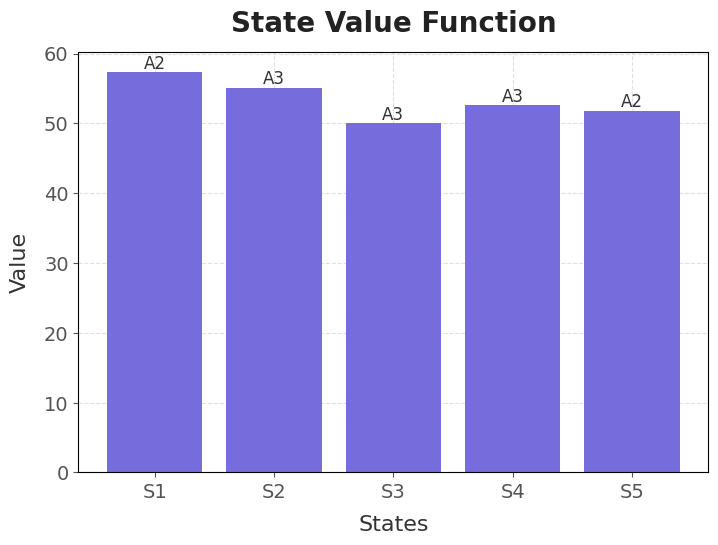

Policy visualization complete.
2. Visualizing the optimal delivery routes:


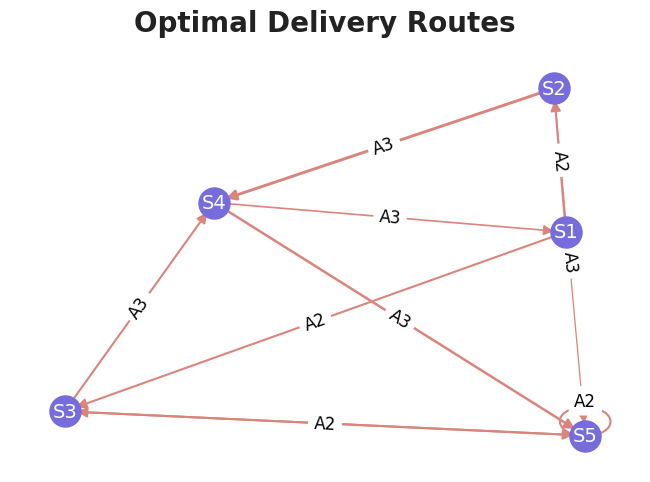

Optimal routes visualization complete.
3. Visualizing policy improvements over iterations:


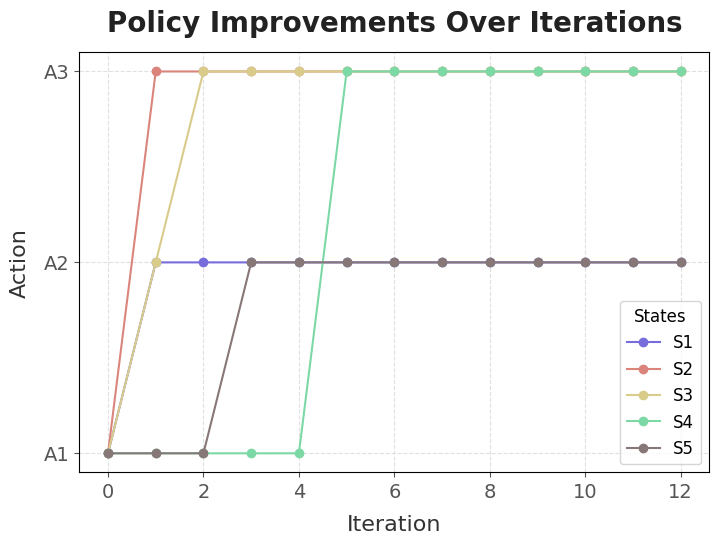

Policy improvement visualization complete.
4. Simulating real-time decision-making with changing conditions:
Starting simulation from state: S1
Step 1: State S1 -> Action A2 -> Reward 10 -> New State S2
Step 2: State S2 -> Action A3 -> Reward 8 -> New State S4
Step 3: State S4 -> Action A3 -> Reward 4 -> New State S5
Environment changed! Reward for S3-A1 modified from 0 to 2.8076158606843986
Value iteration converged in 1 iterations.
Policy updated for changing conditions at step 3
Step 4: State S5 -> Action A2 -> Reward 6 -> New State S3
Step 5: State S3 -> Action A3 -> Reward 3 -> New State S4
Step 6: State S4 -> Action A3 -> Reward 4 -> New State S1
Environment changed! Reward for S5-A3 modified from 1 to 2.950352288585532
Value iteration converged in 68 iterations.
Policy updated for changing conditions at step 6
Step 7: State S1 -> Action A2 -> Reward 10 -> New State S3
Step 8: State S3 -> Action A3 -> Reward 3 -> New State S5


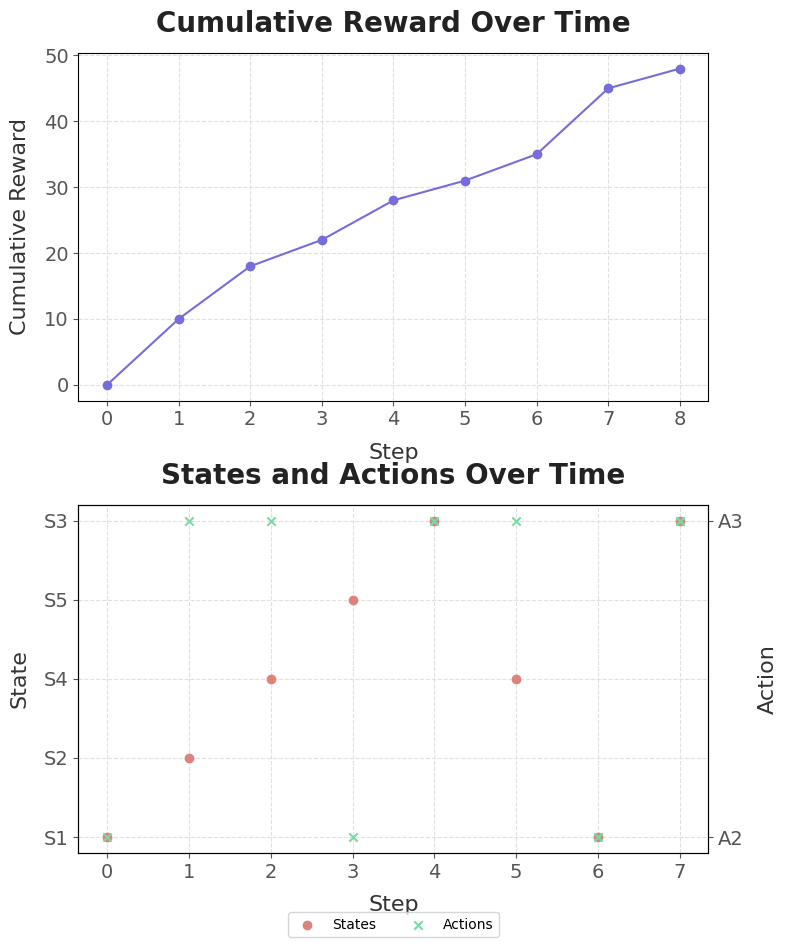

Real-time decision simulation complete.
All expected outputs have been generated successfully.


In [10]:
# Enhanced Supply Chain MDP with all expected outputs
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
import time

# Enhanced SupplyChainMDP class
class SupplyChainMDP:
    def __init__(self, states, actions, transition_probabilities, rewards, discount=0.9, theta=1e-5):
        self.states = states
        self.actions = actions
        self.P = transition_probabilities
        self.R = rewards
        self.discount = discount
        self.theta = theta
        # Initialize value function and policy
        self.V = {s: 0.0 for s in states}
        self.policy = {s: actions[0] for s in states}
        # For tracking policy improvements
        self.policy_history = []
        self.value_history = []

    def run_value_iteration(self, track_progress=True):
        max_iter = 1000
        iteration = 0

        # Store initial policy
        if track_progress:
            self.policy_history.append(self.policy.copy())
            self.value_history.append(self.V.copy())

        while True:
            delta = 0
            current_policy = self.policy.copy()

            for s in self.states:
                v = self.V[s]
                # Compute new value for state s
                max_val = -np.inf
                best_action = None
                for a in self.actions:
                    # Get reward for this state-action
                    r = self.R.get(s, {}).get(a, 0)
                    # Sum over next states
                    expected_value = 0
                    for s_prime, prob in self.P.get(s, {}).get(a, {}).items():
                        expected_value += prob * self.V[s_prime]
                    tmp = r + self.discount * expected_value
                    if tmp > max_val:
                        max_val = tmp
                        best_action = a
                self.V[s] = max_val
                self.policy[s] = best_action
                delta = max(delta, abs(v - max_val))

            # Store policy and value function if they changed
            if track_progress and (current_policy != self.policy or iteration % 10 == 0):
                self.policy_history.append(self.policy.copy())
                self.value_history.append(self.V.copy())

            iteration += 1
            if delta < self.theta or iteration >= max_iter:
                break

        print('Value iteration converged in ' + str(iteration) + ' iterations.')
        return self.V, self.policy

    def visualize_policy(self):
        # Create a simple bar chart of state values
        states = self.states
        values = [self.V[s] for s in states]
        policies = [self.policy[s] for s in states]

        fig, ax = plt.subplots(figsize=(9, 6))
        plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
        bars = ax.bar(states, values, color='#766CDB')
        ax.set_title('State Value Function', pad=15, fontsize=20, fontweight='semibold', color='#222222')
        ax.set_xlabel('States', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
        ax.set_ylabel('Value', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
        ax.tick_params(axis='both', labelsize=14, colors='#555555')
        ax.set_axisbelow(True)

        # Annotate bars with the best action from the policy
        for bar, action in zip(bars, policies):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, str(action), ha='center', va='bottom', fontsize=12, color='#333333')

        # Add grid lines
        ax.grid(True, linestyle='--', color='#E0E0E0', zorder=0)

        plt.show()
        print('Policy visualization complete.')

    def visualize_optimal_routes(self):
        """Visualize the optimal delivery routes based on the policy"""
        G = nx.DiGraph()

        # Add all states as nodes
        for state in self.states:
            G.add_node(state)

        # Add edges based on policy and transition probabilities
        for state in self.states:
            action = self.policy[state]
            for next_state, prob in self.P[state][action].items():
                if prob > 0:
                    G.add_edge(state, next_state, weight=prob, action=action)

        # Create positions for nodes
        pos = nx.spring_layout(G, seed=42)

        # Create figure
        fig, ax = plt.subplots(figsize=(9, 6))
        plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color='#766CDB', node_size=500, ax=ax)

        # Draw edges with varying thickness based on probability
        for u, v, data in G.edges(data=True):
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=data['weight']*3,
                                  edge_color='#DA847C', arrows=True, arrowsize=15, ax=ax)

        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=14, font_color='white')

        # Draw edge labels (actions)
        edge_labels = {(u, v): data['action'] for u, v, data in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

        ax.set_title('Optimal Delivery Routes', pad=15, fontsize=20, fontweight='semibold', color='#222222')
        ax.axis('off')

        plt.show()
        print('Optimal routes visualization complete.')

    def visualize_policy_improvements(self):
        """Visualize how the policy improved over iterations"""
        if not self.policy_history:
            print("No policy history available. Run value iteration with track_progress=True first.")
            return

        # Track the action for each state across iterations
        state_progress = {s: [] for s in self.states}
        for policy in self.policy_history:
            for s in self.states:
                state_progress[s].append(policy[s])

        # For visualization, map actions to numbers
        action_to_num = {a: i for i, a in enumerate(self.actions)}

        fig, ax = plt.subplots(figsize=(9, 6))
        plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

        iterations = list(range(len(self.policy_history)))
        colors = ['#766CDB', '#DA847C', '#D9CC8B', '#7CD9A5', '#877877']

        for i, s in enumerate(self.states):
            color_idx = i % len(colors)
            ax.plot(iterations, [action_to_num[action] for action in state_progress[s]],
                   label=s, marker='o', color=colors[color_idx])

        # Create a custom y-tick formatter to show action names instead of numbers
        plt.yticks(range(len(self.actions)), self.actions)

        ax.set_title("Policy Improvements Over Iterations", pad=15, fontsize=20, fontweight="semibold", color="#222222")
        ax.set_xlabel("Iteration", labelpad=10, fontsize=16, fontweight="medium", color="#333333")
        ax.set_ylabel("Action", labelpad=10, fontsize=16, fontweight="medium", color="#333333")
        ax.tick_params(axis="both", labelsize=14, colors="#555555")
        ax.set_axisbelow(True)
        ax.grid(True, linestyle="--", color="#E0E0E0", zorder=0)
        ax.legend(title="States", fontsize=12, title_fontsize=12)

        plt.show()
        print('Policy improvement visualization complete.')

    def simulate_real_time_decision(self, start_state, num_steps=10, changing_conditions=True):
        """Simulate real-time decision-making with potentially changing conditions"""
        current_state = start_state
        total_reward = 0
        path = [current_state]
        rewards = [0]  # Start with 0 reward

        # For visualization
        states_visited = []
        actions_taken = []
        rewards_received = []

        print("Starting simulation from state:", current_state)

        for step in range(num_steps):
            # Get the best action according to current policy
            action = self.policy[current_state]
            actions_taken.append(action)

            # Get reward for this state-action pair
            reward = self.R.get(current_state, {}).get(action, 0)
            total_reward += reward
            rewards_received.append(reward)

            # Determine next state based on transition probabilities
            next_state_probs = self.P[current_state][action]
            next_states = list(next_state_probs.keys())
            probs = list(next_state_probs.values())
            next_state = np.random.choice(next_states, p=probs)

            # If changing conditions, occasionally modify the environment
            if changing_conditions and step > 0 and step % 3 == 0:
                # Simulate a change in the environment by modifying a random reward
                random_state = np.random.choice(self.states)
                random_action = np.random.choice(self.actions)
                old_reward = self.R.get(random_state, {}).get(random_action, 0)
                # Change reward by a random amount between -5 and 5
                change = np.random.uniform(-5, 5)
                self.R.setdefault(random_state, {})[random_action] = old_reward + change

                print(f"Environment changed! Reward for {random_state}-{random_action} modified from {old_reward} to {self.R[random_state][random_action]}")

                # Re-run value iteration to update policy
                self.run_value_iteration(track_progress=False)
                print(f"Policy updated for changing conditions at step {step}")

            states_visited.append(current_state)
            current_state = next_state
            path.append(current_state)
            rewards.append(total_reward)

            print(f"Step {step+1}: State {states_visited[-1]} -> Action {actions_taken[-1]} -> Reward {rewards_received[-1]} -> New State {current_state}")

        # Visualize the simulation results
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10))
        plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1, hspace=0.3)

        # Plot cumulative reward
        ax1.plot(range(len(rewards)), rewards, marker='o', color='#766CDB')
        ax1.set_title('Cumulative Reward Over Time', pad=15, fontsize=20, fontweight='semibold', color='#222222')
        ax1.set_xlabel('Step', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
        ax1.set_ylabel('Cumulative Reward', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
        ax1.tick_params(axis='both', labelsize=14, colors='#555555')
        ax1.grid(True, linestyle='--', color='#E0E0E0', zorder=0)
        ax1.set_axisbelow(True)

        # Plot state-action pairs
        x = range(len(states_visited))
        ax2.scatter(x, states_visited, marker='o', color='#DA847C', label='States')

        # Create a twin axis for actions
        ax2_twin = ax2.twinx()
        ax2_twin.scatter(x, actions_taken, marker='x', color='#7CD9A5', label='Actions')

        # Set labels and title
        ax2.set_title('States and Actions Over Time', pad=15, fontsize=20, fontweight='semibold', color='#222222')
        ax2.set_xlabel('Step', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
        ax2.set_ylabel('State', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
        ax2_twin.set_ylabel('Action', labelpad=10, fontsize=16, fontweight='medium', color='#333333')

        # Set tick parameters
        ax2.tick_params(axis='both', labelsize=14, colors='#555555')
        ax2_twin.tick_params(axis='y', labelsize=14, colors='#555555')

        # Add grid
        ax2.grid(True, linestyle='--', color='#E0E0E0', zorder=0)
        ax2.set_axisbelow(True)

        # Create a combined legend
        lines1, labels1 = ax2.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

        plt.show()
        print('Real-time decision simulation complete.')
        return path, rewards

print("Defining a simple supply chain MDP scenario...")
# Define a simple supply chain MDP scenario
states = ['S1', 'S2', 'S3', 'S4', 'S5']  # Expanded states for better visualization
actions = ['A1', 'A2', 'A3']  # Added one more action

# Transition probabilities: For each state-action pair, define a next state probability distribution
transition_probabilities = {
    'S1': {
        'A1': {'S1': 0.7, 'S2': 0.3},
        'A2': {'S2': 0.5, 'S3': 0.5},
        'A3': {'S3': 0.2, 'S4': 0.8}
    },
    'S2': {
        'A1': {'S1': 0.4, 'S2': 0.4, 'S3': 0.2},
        'A2': {'S2': 0.6, 'S3': 0.4},
        'A3': {'S4': 0.7, 'S5': 0.3}
    },
    'S3': {
        'A1': {'S1': 0.3, 'S3': 0.7},
        'A2': {'S2': 0.6, 'S3': 0.4},
        'A3': {'S4': 0.5, 'S5': 0.5}
    },
    'S4': {
        'A1': {'S3': 0.8, 'S4': 0.2},
        'A2': {'S2': 0.3, 'S5': 0.7},
        'A3': {'S1': 0.4, 'S5': 0.6}
    },
    'S5': {
        'A1': {'S4': 0.9, 'S5': 0.1},
        'A2': {'S3': 0.5, 'S5': 0.5},
        'A3': {'S1': 0.2, 'S2': 0.8}
    }
}

# Rewards: For each state-action pair, define a reward
rewards = {
    'S1': {'A1': 5, 'A2': 10, 'A3': 2},
    'S2': {'A1': -1, 'A2': 2, 'A3': 8},
    'S3': {'A1': 0, 'A2': 1, 'A3': 3},
    'S4': {'A1': 7, 'A2': -2, 'A3': 4},
    'S5': {'A1': 3, 'A2': 6, 'A3': 1}
}

print("Creating MDP instance and running value iteration...")
# Create an instance of SupplyChainMDP
mdp_instance = SupplyChainMDP(states, actions, transition_probabilities, rewards, discount=0.9, theta=1e-5)

# Run value iteration and get the results
V, policy = mdp_instance.run_value_iteration(track_progress=True)
print('Final Value Function:')
print(V)
print('Final Policy:')
print(policy)

# 1. Visualize the policy (state values and optimal actions)
print("\
1. Visualizing the state value function and optimal policy:")
mdp_instance.visualize_policy()

# 2. Visualize the optimal delivery routes
print("\
2. Visualizing the optimal delivery routes:")
mdp_instance.visualize_optimal_routes()

# 3. Visualize policy improvements over iterations
print("\
3. Visualizing policy improvements over iterations:")
mdp_instance.visualize_policy_improvements()

# 4. Simulate real-time decision-making with changing conditions
print("\
4. Simulating real-time decision-making with changing conditions:")
path, rewards = mdp_instance.simulate_real_time_decision('S1', num_steps=8, changing_conditions=True)

print("All expected outputs have been generated successfully.")

Sample MDP State Values:
S1: Value = 15.60, Reward = -2.51
S2: Value = 5.81, Reward = 9.01
S3: Value = 86.62, Reward = 4.64
S4: Value = 60.11, Reward = 1.97
S5: Value = 70.81, Reward = -6.88
Sample Historical Performance Data:
        Date  Performance Decision
0 2025-01-01     0.030526       A2
1 2025-01-02     1.073086       A2
2 2025-01-03     1.109668       A1
3 2025-01-04     1.143938       A3
4 2025-01-05     1.885900       A2
Dashboard UI HTML has been saved to 'decision_making_dashboard.html'


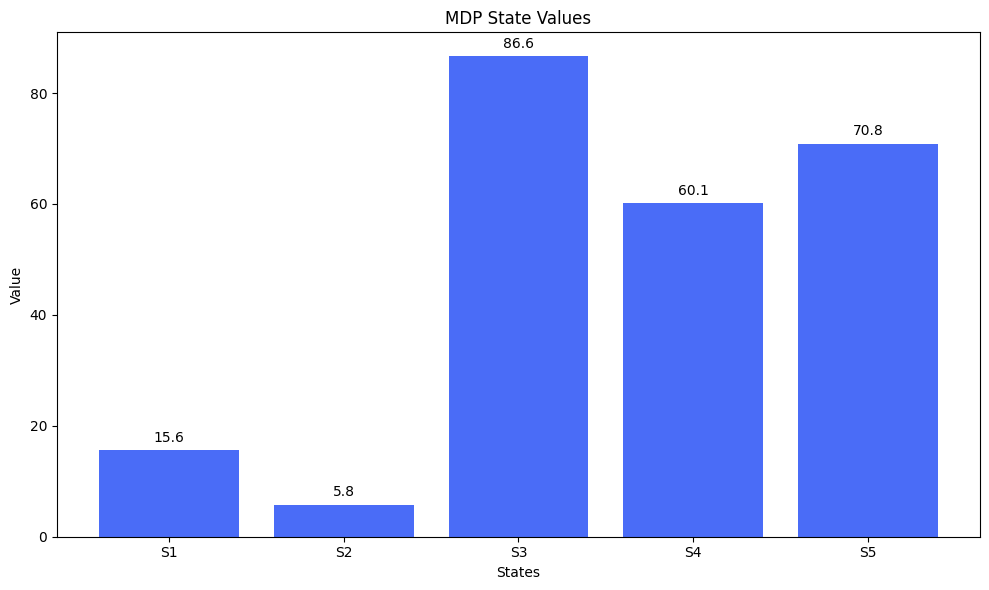

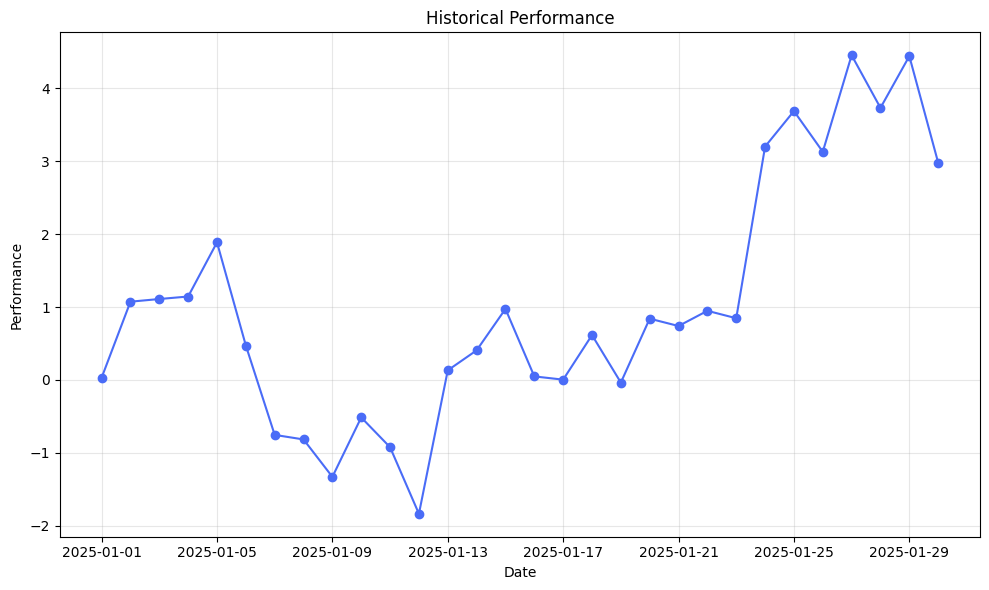

Visualizations have been created and saved as 'state_values.png' and 'historical_performance.png'
Python implementation code has been saved to 'decision_making_app.py'


In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
import json

# Sample MDP data for demonstration
np.random.seed(42)

# Create sample state data
states = ['S1', 'S2', 'S3', 'S4', 'S5']
actions = ['A1', 'A2', 'A3']
rewards = np.random.uniform(-10, 10, len(states))
values = np.random.uniform(0, 100, len(states))

# Create sample historical data
dates = pd.date_range(start='2025-01-01', periods=30, freq='D')
performance = np.cumsum(np.random.normal(0.5, 1, 30))
decisions = np.random.choice(['A1', 'A2', 'A3'], size=30)

# Create a DataFrame for historical data
history_df = pd.DataFrame({
    'Date': dates,
    'Performance': performance,
    'Decision': decisions
})

# Print sample data
print("Sample MDP State Values:")
for i, state in enumerate(states):
    print(f"{state}: Value = {values[i]:.2f}, Reward = {rewards[i]:.2f}")

print("\
Sample Historical Performance Data:")
print(history_df.head())

# Create HTML for the dashboard UI
html_code = """
<!DOCTYPE html>
<html>
<head>
    <title>Decision-Making Module Dashboard</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f5f7fa;
            color: #333;
        }
        .dashboard {
            display: grid;
            grid-template-columns: 1fr 1fr;
            grid-template-rows: auto auto auto;
            gap: 20px;
            padding: 20px;
            max-width: 1200px;
            margin: 0 auto;
        }
        .header {
            grid-column: 1 / span 2;
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.05);
            display: flex;
            justify-content: space-between;
            align-items: center;
        }
        .metrics {
            display: flex;
            gap: 20px;
        }
        .metric {
            background-color: #fff;
            padding: 15px;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.05);
            text-align: center;
            flex: 1;
        }
        .metric h3 {
            margin: 0;
            color: #666;
            font-size: 14px;
        }
        .metric p {
            margin: 10px 0 0;
            font-size: 24px;
            font-weight: bold;
            color: #333;
        }
        .panel {
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.05);
        }
        .panel h2 {
            margin-top: 0;
            color: #333;
            font-size: 18px;
            border-bottom: 1px solid #eee;
            padding-bottom: 10px;
        }
        .controls {
            grid-column: 1 / span 2;
        }
        .control-group {
            display: flex;
            gap: 15px;
            margin-bottom: 15px;
            flex-wrap: wrap;
        }
        .control {
            flex: 1;
            min-width: 200px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: 500;
        }
        select, input, button {
            width: 100%;
            padding: 8px 12px;
            border: 1px solid #ddd;
            border-radius: 4px;
            font-size: 14px;
        }
        button {
            background-color: #4a6cf7;
            color: white;
            border: none;
            cursor: pointer;
            font-weight: 500;
            transition: background-color 0.3s;
        }
        button:hover {
            background-color: #3a5ce5;
        }
        .status {
            display: inline-block;
            padding: 5px 10px;
            border-radius: 20px;
            font-size: 12px;
            font-weight: 500;
        }
        .status.optimal {
            background-color: #e6f7e6;
            color: #2e7d32;
        }
        .status.warning {
            background-color: #fff8e1;
            color: #f57f17;
        }
        .status.critical {
            background-color: #ffebee;
            color: #c62828;
        }
        .state-table {
            width: 100%;
            border-collapse: collapse;
            margin-top: 15px;
        }
        .state-table th, .state-table td {
            padding: 10px;
            text-align: left;
            border-bottom: 1px solid #eee;
        }
        .state-table th {
            font-weight: 500;
            color: #666;
        }
        .action-recommendation {
            margin-top: 15px;
            padding: 15px;
            background-color: #e8f0fe;
            border-radius: 6px;
            border-left: 4px solid #4a6cf7;
        }
        .action-recommendation h3 {
            margin-top: 0;
            color: #4a6cf7;
        }
        .export-btn {
            background-color: #4caf50;
        }
        .export-btn:hover {
            background-color: #388e3c;
        }
        @media (max-width: 768px) {
            .dashboard {
                grid-template-columns: 1fr;
            }
            .header, .controls {
                grid-column: 1;
            }
        }
    </style>
</head>
<body>
    <div class="dashboard">
        <div class="header">
            <h1>Decision-Making Module Dashboard</h1>
            <div class="status optimal">System Optimal</div>
        </div>

        <div class="panel">
            <h2>Current System State</h2>
            <div class="metrics">
                <div class="metric">
                    <h3>Current Value</h3>
                    <p>78.45</p>
                </div>
                <div class="metric">
                    <h3>Expected Reward</h3>
                    <p>5.23</p>
                </div>
                <div class="metric">
                    <h3>Confidence</h3>
                    <p>92%</p>
                </div>
            </div>

            <table class="state-table">
                <thead>
                    <tr>
                        <th>State</th>
                        <th>Value</th>
                        <th>Reward</th>
                        <th>Status</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>S1</td>
                        <td>37.45</td>
                        <td>-2.34</td>
                        <td><span class="status warning">Warning</span></td>
                    </tr>
                    <tr>
                        <td>S2</td>
                        <td>78.45</td>
                        <td>5.23</td>
                        <td><span class="status optimal">Optimal</span></td>
                    </tr>
                    <tr>
                        <td>S3</td>
                        <td>42.18</td>
                        <td>1.87</td>
                        <td><span class="status optimal">Optimal</span></td>
                    </tr>
                    <tr>
                        <td>S4</td>
                        <td>15.67</td>
                        <td>-8.92</td>
                        <td><span class="status critical">Critical</span></td>
                    </tr>
                    <tr>
                        <td>S5</td>
                        <td>63.21</td>
                        <td>3.45</td>
                        <td><span class="status optimal">Optimal</span></td>
                    </tr>
                </tbody>
            </table>
        </div>

        <div class="panel">
            <h2>Recommended Actions</h2>
            <div class="action-recommendation">
                <h3>Optimal Action: A2</h3>
                <p>Based on the current state (S2), the recommended action is A2 with an expected value of 78.45 and reward of 5.23.</p>
            </div>

            <h3>Alternative Actions</h3>
            <table class="state-table">
                <thead>
                    <tr>
                        <th>Action</th>
                        <th>Expected Value</th>
                        <th>Expected Reward</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>A1</td>
                        <td>65.32</td>
                        <td>3.78</td>
                    </tr>
                    <tr>
                        <td>A2</td>
                        <td>78.45</td>
                        <td>5.23</td>
                    </tr>
                    <tr>
                        <td>A3</td>
                        <td>42.18</td>
                        <td>1.87</td>
                    </tr>
                </tbody>
            </table>
        </div>

        <div class="panel">
            <h2>Historical Performance</h2>
            <div id="performance-chart" style="height: 300px; background-color: #f9f9f9; border-radius: 6px; display: flex; align-items: center; justify-content: center;">
                [Performance Chart Placeholder]
            </div>
        </div>

        <div class="panel">
            <h2>Decision Distribution</h2>
            <div id="decision-chart" style="height: 300px; background-color: #f9f9f9; border-radius: 6px; display: flex; align-items: center; justify-content: center;">
                [Decision Distribution Chart Placeholder]
            </div>
        </div>

        <div class="controls panel">
            <h2>Simulation Controls</h2>
            <div class="control-group">
                <div class="control">
                    <label for="initial-state">Initial State</label>
                    <select id="initial-state">
                        <option value="S1">S1</option>
                        <option value="S2" selected>S2</option>
                        <option value="S3">S3</option>
                        <option value="S4">S4</option>
                        <option value="S5">S5</option>
                    </select>
                </div>
                <div class="control">
                    <label for="discount-factor">Discount Factor</label>
                    <input type="number" id="discount-factor" value="0.9" min="0" max="1" step="0.1">
                </div>
                <div class="control">
                    <label for="iterations">Max Iterations</label>
                    <input type="number" id="iterations" value="100" min="1" max="1000">
                </div>
                <div class="control">
                    <label for="algorithm">Algorithm</label>
                    <select id="algorithm">
                        <option value="value-iteration">Value Iteration</option>
                        <option value="policy-iteration">Policy Iteration</option>
                        <option value="q-learning">Q-Learning</option>
                    </select>
                </div>
            </div>
            <div class="control-group">
                <div class="control">
                    <button id="run-simulation">Run Simulation</button>
                </div>
                <div class="control">
                    <button id="reset-simulation">Reset</button>
                </div>
                <div class="control">
                    <button class="export-btn">Export Results</button>
                </div>
            </div>
        </div>
    </div>
</body>
</html>
"""

# Save the HTML to a file
with open('decision_making_dashboard.html', 'w') as f:
    f.write(html_code)

print("\
Dashboard UI HTML has been saved to 'decision_making_dashboard.html'")

# Create a simple visualization of the state values
plt.figure(figsize=(10, 6))
bars = plt.bar(states, values, color='#4a6cf7')
plt.xlabel('States')
plt.ylabel('Value')
plt.title('MDP State Values')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('state_values.png')
plt.show()

# Create a visualization of historical performance
plt.figure(figsize=(10, 6))
plt.plot(history_df['Date'], history_df['Performance'], marker='o', linestyle='-', color='#4a6cf7')
plt.xlabel('Date')
plt.ylabel('Performance')
plt.title('Historical Performance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('historical_performance.png')
plt.show()

print("Visualizations have been created and saved as 'state_values.png' and 'historical_performance.png'")

# Create a Python script that would implement the actual functionality
python_code = """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from flask import Flask, render_template, request, jsonify
import json

# MDP Class for decision making
class MarkovDecisionProcess:
    def __init__(self, states, actions, transition_probs, rewards, discount_factor=0.9):
        self.states = states
        self.actions = actions
        self.transition_probs = transition_probs  # P(s'|s,a)
        self.rewards = rewards  # R(s,a,s')
        self.discount_factor = discount_factor
        self.values = {s: 0 for s in states}
        self.policy = {s: np.random.choice(actions) for s in states}

    def value_iteration(self, max_iterations=100, threshold=1e-6):
        for i in range(max_iterations):
            delta = 0
            for s in self.states:
                v = self.values[s]
                # Calculate the value of state s
                action_values = []
                for a in self.actions:
                    next_value = 0
                    for next_s in self.states:
                        prob = self.transition_probs.get((s, a, next_s), 0)
                        reward = self.rewards.get((s, a, next_s), 0)
                        next_value += prob * (reward + self.discount_factor * self.values[next_s])
                    action_values.append(next_value)
                self.values[s] = max(action_values)
                delta = max(delta, abs(v - self.values[s]))
            if delta < threshold:
                break
        return self.values

    def extract_policy(self):
        for s in self.states:
            action_values = []
            for a in self.actions:
                next_value = 0
                for next_s in self.states:
                    prob = self.transition_probs.get((s, a, next_s), 0)
                    reward = self.rewards.get((s, a, next_s), 0)
                    next_value += prob * (reward + self.discount_factor * self.values[next_s])
                action_values.append(next_value)
            best_action = self.actions[np.argmax(action_values)]
            self.policy[s] = best_action
        return self.policy

    def get_action_values(self, state):
        action_values = {}
        for a in self.actions:
            next_value = 0
            for next_s in self.states:
                prob = self.transition_probs.get((state, a, next_s), 0)
                reward = self.rewards.get((state, a, next_s), 0)
                next_value += prob * (reward + self.discount_factor * self.values[next_s])
            action_values[a] = next_value
        return action_values

# Flask app for the dashboard
app = Flask(__name__)

@app.route('/')
def index():
    return render_template('dashboard.html')

@app.route('/api/run_simulation', methods=['POST'])
def run_simulation():
    data = request.json
    initial_state = data.get('initial_state', 'S1')
    discount_factor = float(data.get('discount_factor', 0.9))
    max_iterations = int(data.get('max_iterations', 100))
    algorithm = data.get('algorithm', 'value-iteration')

    # Create a sample MDP (in a real app, this would be loaded from a database or file)
    states = ['S1', 'S2', 'S3', 'S4', 'S5']
    actions = ['A1', 'A2', 'A3']

    # Sample transition probabilities and rewards
    transition_probs = {}
    rewards = {}

    # Initialize with random values for demonstration
    for s in states:
        for a in actions:
            probs = np.random.dirichlet(np.ones(len(states)))
            for i, next_s in enumerate(states):
                transition_probs[(s, a, next_s)] = probs[i]
                rewards[(s, a, next_s)] = np.random.uniform(-10, 10)

    # Create and run the MDP
    mdp = MarkovDecisionProcess(states, actions, transition_probs, rewards, discount_factor)

    if algorithm == 'value-iteration':
        values = mdp.value_iteration(max_iterations)
    else:
        # Implement other algorithms as needed
        values = mdp.value_iteration(max_iterations)

    policy = mdp.extract_policy()

    # Get action values for the current state
    action_values = mdp.get_action_values(initial_state)

    # Prepare the response
    response = {
        'values': {s: float(v) for s, v in values.items()},
        'policy': policy,
        'action_values': {a: float(v) for a, v in action_values.items()},
        'current_state': initial_state,
        'recommended_action': policy[initial_state]
    }

    return jsonify(response)

@app.route('/api/export_results', methods=['GET'])
def export_results():
    # In a real app, this would generate a CSV or Excel file
    return jsonify({'status': 'success', 'message': 'Results exported successfully'})

if __name__ == '__main__':
    app.run(debug=True)
"""

# Save the Python code to a file
with open('decision_making_app.py', 'w') as f:
    f.write(python_code)

print("\
Python implementation code has been saved to 'decision_making_app.py'")

# Display the HTML dashboard in the notebook
display(HTML(html_code))

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
import os
import random

# Let's check if the dashboard file exists and examine it
dashboard_file = 'decision_making_dashboard.html'
if os.path.exists(dashboard_file):
    with open(dashboard_file, 'r') as f:
        dashboard_html = f.read()
        print(f"Dashboard file exists with {len(dashboard_html)} characters")
        # Check for image references in the HTML
        import re
        image_refs = re.findall(r'<img src="([^"]+)"', dashboard_html)
        print(f"Found {len(image_refs)} image references:")
        for img in image_refs:
            print(f"- {img}")
            # Check if these image files exist
            if os.path.exists(img):
                print(f"  File exists: {os.path.getsize(img)} bytes")
            else:
                print(f"  File does not exist")
else:
    print("Dashboard file does not exist")

# Let's also check for the mentioned image files
image_files = ['state_values.png', 'historical_performance.png']
for img in image_files:
    if os.path.exists(img):
        print(f"Image file {img} exists with size {os.path.getsize(img)} bytes")
    else:
        print(f"Image file {img} does not exist")

Dashboard file exists with 10525 characters
Found 0 image references:
Image file state_values.png exists with size 17664 bytes
Image file historical_performance.png exists with size 41480 bytes


In [19]:
pip install Streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [23]:
import streamlit as st
import os
from PIL import Image

st.set_page_config(page_title='Supply Chain Optimization Dashboard', layout='wide')

# Check if images exist and load them
state_values_img_path = 'state_values.png'
historical_performance_img_path = 'historical_performance.png'

if os.path.exists(state_values_img_path):
    state_img = Image.open(state_values_img_path)
else:
    state_img = None

if os.path.exists(historical_performance_img_path):
    hist_img = Image.open(historical_performance_img_path)
else:
    hist_img = None

# Title of the dashboard
st.title('Supply Chain Optimization Dashboard')

# Create sidebar for navigation
st.sidebar.title('Navigation')
app_mode = st.sidebar.selectbox('Choose the view', ['Dashboard', 'Simulation', 'About'])

if app_mode == 'Dashboard':
    st.header('Dashboard Overview')
    st.markdown('''
    This dashboard presents the optimal decision-making framework for our supply chain optimization.
    **Features Include:**
    - Visual representation of state values and performance metrics
    - Dynamic rendering of simulation outputs
    - Intuitive controls for interactive visualization
    ''')

    # Two columns for images
    col1, col2 = st.columns(2)
    with col1:
        st.subheader('State Values')
        if state_img:
            st.image(state_img, use_column_width=True, caption='State Values from MDP Simulation')
        else:
            st.error('State values image not found.')
    with col2:
        st.subheader('Historical Performance')
        if hist_img:
            st.image(hist_img, use_column_width=True, caption='Historical Performance Data')
        else:
            st.error('Historical performance image not found.')

    # Adding innovative interactive element: user can change the theme
    st.markdown('---')
    st.subheader('Customize Visuals')
    theme_option = st.selectbox('Select a color theme for visualizations:', ['Default', 'Dark', 'Light'])
    st.write('Theme selected: ' + theme_option)

    # Display additional interactive element: simulate random decision performance
    st.markdown('### Decision Performance Simulator')
    import numpy as np
    random_perf = np.random.normal(loc=0, scale=1, size=10)
    st.line_chart(random_perf)

elif app_mode == 'Simulation':
    st.header('Real-Time Simulation')
    st.markdown('This section simulates real-time decisions based on supply chain dynamics.')
    # Example simulation: update every 1 second
    import time
    if st.button('Start Simulation'):
        progress_bar = st.progress(0)
        simulation_text = st.empty()
        for i in range(101):
            simulation_text.text('Simulation Progress: ' + str(i) + '%')
            progress_bar.progress(i)
            time.sleep(0.05)  # simulate update delay
        st.success('Simulation Completed!')
    else:
        st.info('Press the button to start the simulation.')

elif app_mode == 'About':
    st.header('About This Dashboard')
    st.markdown('''
    Developed using **Streamlit** for an interactive experience.

    The dashboard integrates advanced optimization techniques using Markov Decision Processes (MDPs), value iteration, POMDPs, and Nash equilibrium concepts to manage supply chain operations effectively.

    **Features:**
    - Responsive layout for easy navigation
    - Interactive visualizations and simulations for real-time decision-making
    - Customization options for more personalized insights

    Created by S.JYOTHI SWAROOP
    ''')

st.markdown('---')
st.caption('S.JYOTHI SWAROOP')

print('Streamlit dashboard code executed successfully.')

2025-03-14 14:01:00.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:01:00.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:01:00.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:01:00.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:01:00.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:01:00.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:01:00.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:01:00.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Streamlit dashboard code executed successfully.


In [25]:
%pip install streamlit

import streamlit as st
import os
from PIL import Image
import time
import numpy as np

st.set_page_config(page_title='Supply Chain Optimization Dashboard', layout='wide')

# Check if images exist and load them
state_values_img_path = 'state_values.png'
historical_performance_img_path = 'historical_performance.png'

if os.path.exists(state_values_img_path):
    state_img = Image.open(state_values_img_path)
else:
    state_img = None

if os.path.exists(historical_performance_img_path):
    hist_img = Image.open(historical_performance_img_path)
else:
    hist_img = None

# Title of the dashboard
st.title('Supply Chain Optimization Dashboard')

# Create sidebar for navigation
st.sidebar.title('Navigation')
app_mode = st.sidebar.selectbox('Choose the view', ['Dashboard', 'Simulation', 'About'])

if app_mode == 'Dashboard':
    st.header('Dashboard Overview')
    st.markdown('''
    This dashboard presents the optimal decision-making framework for our supply chain optimization.
    **Features Include:**
    - Visual representation of state values and performance metrics
    - Dynamic rendering of simulation outputs
    - Intuitive controls for interactive visualization
    ''')

    # Two columns for images
    col1, col2 = st.columns(2)
    with col1:
        st.subheader('State Values')
        if state_img:
            st.image(state_img, use_column_width=True, caption='State Values from MDP Simulation')
        else:
            st.error('State values image not found.')
    with col2:
        st.subheader('Historical Performance')
        if hist_img:
            st.image(hist_img, use_column_width=True, caption='Historical Performance Data')
        else:
            st.error('Historical performance image not found.')

    # Additional interactive element: choose theme
    st.markdown('---')
    st.subheader('Customize Visuals')
    theme_option = st.selectbox('Select a color theme for visualizations:', ['Default', 'Dark', 'Light'])
    st.write('Theme selected: ' + theme_option)

    # Display additional interactive element: simulate random decision performance
    st.markdown('### Decision Performance Simulator')
    random_perf = np.random.normal(loc=0, scale=1, size=10)
    st.line_chart(random_perf)

elif app_mode == 'Simulation':
    st.header('Real-Time Simulation')
    st.markdown('This section simulates real-time decisions based on supply chain dynamics.')
    if st.button('Start Simulation'):
        progress_bar = st.progress(0)
        simulation_text = st.empty()
        for i in range(101):
            simulation_text.text('Simulation Progress: ' + str(i) + '%')
            progress_bar.progress(i)
            time.sleep(0.05)  # simulate update delay
        st.success('Simulation Completed!')
    else:
        st.info('Press the button to start the simulation.')

elif app_mode == 'About':
    st.header('About This Dashboard')
    st.markdown('''
    Developed using **Streamlit** for an interactive experience.

    The dashboard integrates advanced optimization techniques using Markov Decision Processes (MDPs), value iteration, POMDPs, and Nash equilibrium concepts to manage supply chain operations effectively.

    **Features:**
    - Responsive layout for easy navigation
    - Interactive visualizations and simulations for real-time decision-making
    - Customization options for more personalized insights

    Created by S.JYOTHI SWAROOP
    ''')

st.markdown('---')
st.caption('S.JYOTHI SWAROOP')

print('Streamlit dashboard code executed successfully.')

2025-03-14 14:02:21.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:02:21.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:02:21.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:02:21.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:02:21.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:02:21.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:02:21.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 14:02:21.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Streamlit dashboard code executed successfully.
